<a href="https://colab.research.google.com/github/yuva1111/Medical_insurance/blob/main/medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
data=pd.read_csv('insurance.csv')

In [295]:
data.shape

(1338, 7)

In [296]:
columns=data.columns
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [297]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [298]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

It is clearly seen that our dataset doesnot contain null values

In [299]:
types=dict(data.dtypes)
types

{'age': dtype('int64'),
 'bmi': dtype('float64'),
 'charges': dtype('float64'),
 'children': dtype('int64'),
 'region': dtype('O'),
 'sex': dtype('O'),
 'smoker': dtype('O')}

Dataset has 4 Numerical variables and 3 categorical variables

In [300]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [301]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Now let explore each categorical variable

In [302]:
categories=[]
for col in columns:
  if types[col]=='object':
    categories.append(col)
categories    

['sex', 'smoker', 'region']

In [303]:
for col in categories:
  print(col,":")
  print(data[col].unique())
  print(data.groupby(col).bmi.count())
  print("=================================")

sex :
['female' 'male']
sex
female    662
male      676
Name: bmi, dtype: int64
smoker :
['yes' 'no']
smoker
no     1064
yes     274
Name: bmi, dtype: int64
region :
['southwest' 'southeast' 'northwest' 'northeast']
region
northeast    324
northwest    325
southeast    364
southwest    325
Name: bmi, dtype: int64


###Feature Engineering and Data Visualization

Text(0, 0.5, 'Frequency')

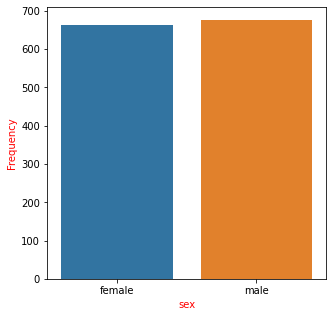

In [304]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="sex")
plt.xlabel("sex",size=10,c="r")
plt.ylabel("Frequency",size=10,c="r")

Text(0, 0.5, 'Frequency')

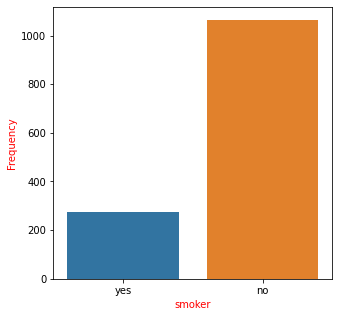

In [305]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="smoker")
plt.xlabel("smoker",size=10,c="r")
plt.ylabel("Frequency",size=10,c="r")

Text(0, 0.5, 'Frequency')

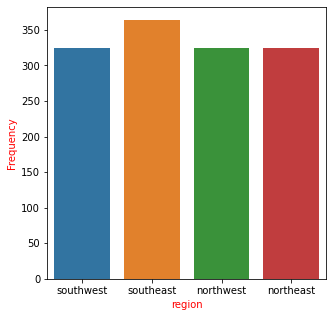

In [306]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="region")
plt.xlabel("region",size=10,c="r")
plt.ylabel("Frequency",size=10,c="r")

Text(0, 0.5, 'charges')

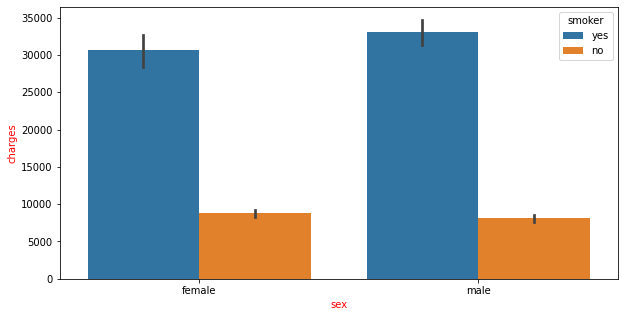

In [307]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,y='charges',x='sex',hue='smoker')
plt.xlabel("sex",size=10,c="r")
plt.ylabel("charges",size=10,c="r")

Text(0, 0.5, 'charges')

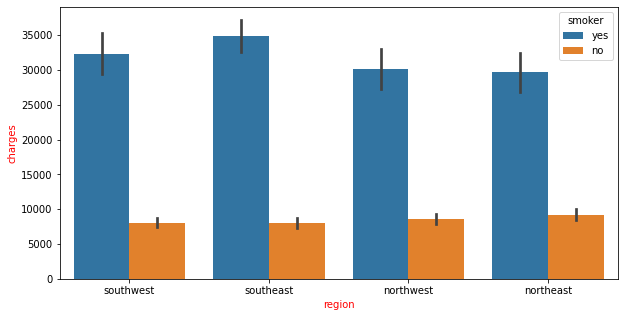

In [308]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,y='charges',x='region',hue='smoker')
plt.xlabel("region",size=10,c="r")
plt.ylabel("charges",size=10,c="r")

Text(0, 0.5, 'charges')

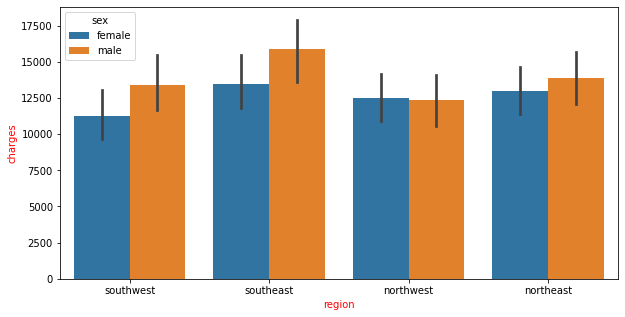

In [309]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,y='charges',x='region',hue='sex')
plt.xlabel("region",size=10,c="r")
plt.ylabel("charges",size=10,c="r")

###outlier checking  using box plots

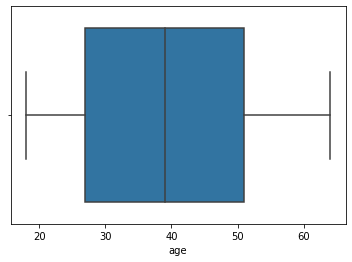

In [310]:
sns.boxplot(x='age',data=data)

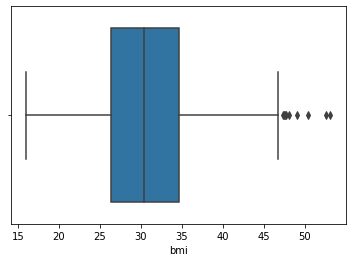

In [311]:
sns.boxplot(x='bmi',data=data)

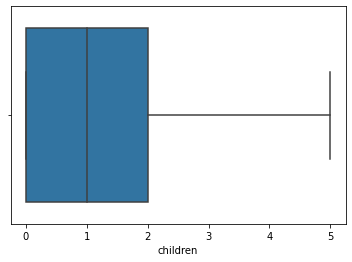

In [312]:
sns.boxplot(x='children',data=data)

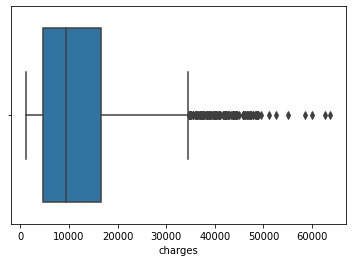

In [313]:
sns.boxplot(x='charges',data=data)

#####checking for the target distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


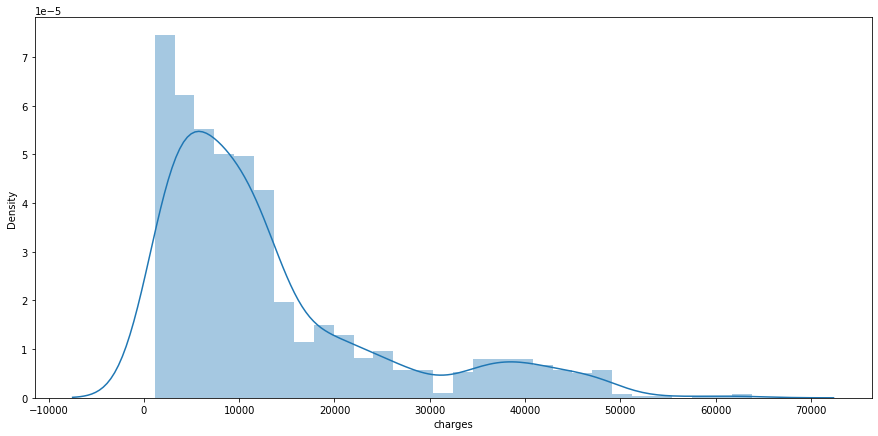

In [314]:
plt.figure(figsize=(15,7))
sns.distplot(data['charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


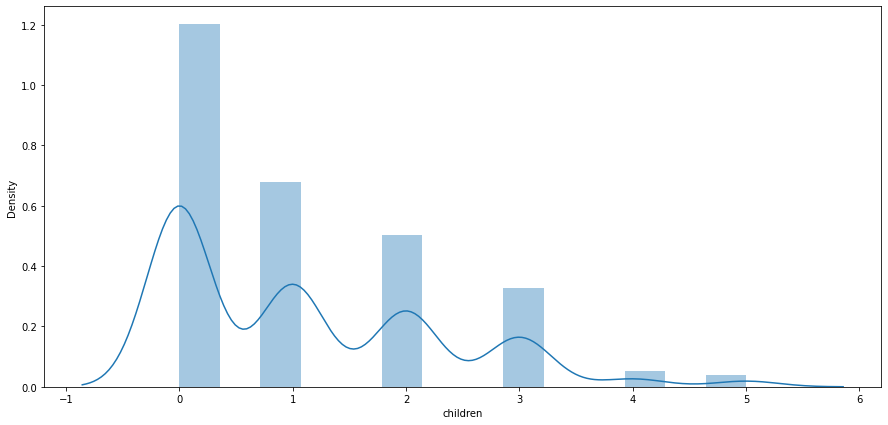

In [315]:
plt.figure(figsize=(15,7))
sns.distplot(data['children'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


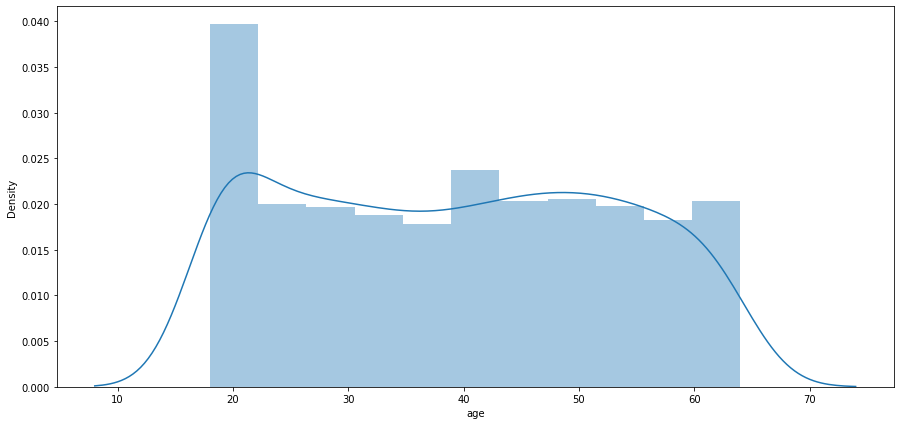

In [316]:
plt.figure(figsize=(15,7))
sns.distplot(data['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


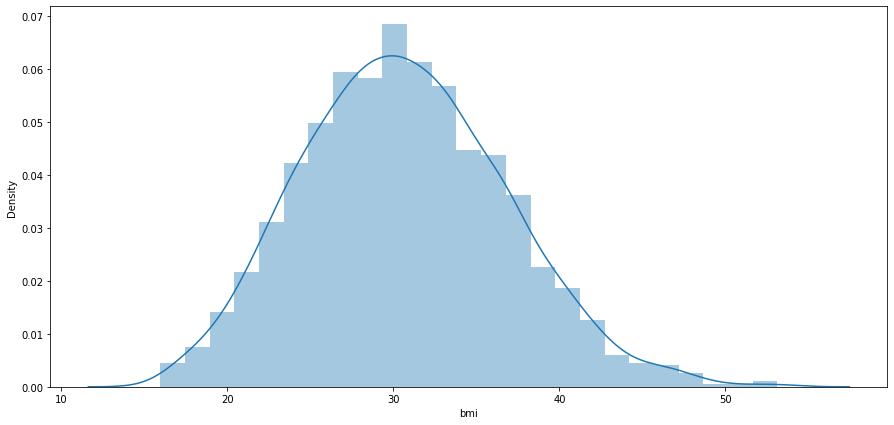

In [317]:
plt.figure(figsize=(15,7))
sns.distplot(data['bmi'])

We can see that data has some skewness we use skewness removal techniques

In [318]:
data['char_sqrt']=np.sqrt(data['charges'])

In [319]:
data

,age,sex,bmi,children,smoker,region,charges,char_sqrt
0,19,female,27.900,0,yes,southwest,16884.92400,129.942002
1,18,male,33.770,1,no,southeast,1725.55230,41.539768
2,28,male,33.000,3,no,southeast,4449.46200,66.704288
3,33,male,22.705,0,no,northwest,21984.47061,148.271611
4,32,male,28.880,0,no,northwest,3866.85520,62.184043
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,102.958964
1334,18,female,31.920,0,no,northeast,2205.98080,46.967870
1335,18,female,36.850,0,no,southeast,1629.83350,40.371196
1336,21,female,25.800,0,no,southwest,2007.94500,44.810099


In [320]:
data['char_sqrt'].skew()

0.7958625166976426

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


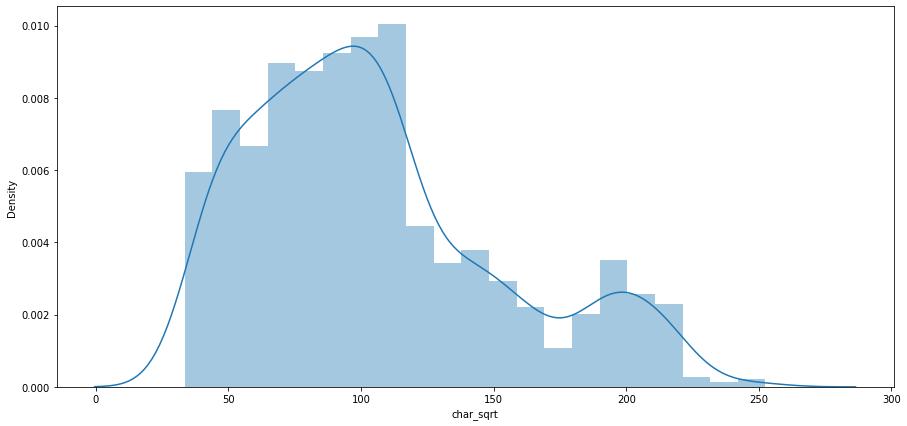

In [321]:
plt.figure(figsize=(15,7))
sns.distplot(data['char_sqrt'])

skew has still positive value.Square root was not completely removed the skewness

How we will use the Log Transformation

In [322]:
data['char_log']=np.log(data['charges'])

In [323]:
data['char_log'].skew()

-0.09009752473024582

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


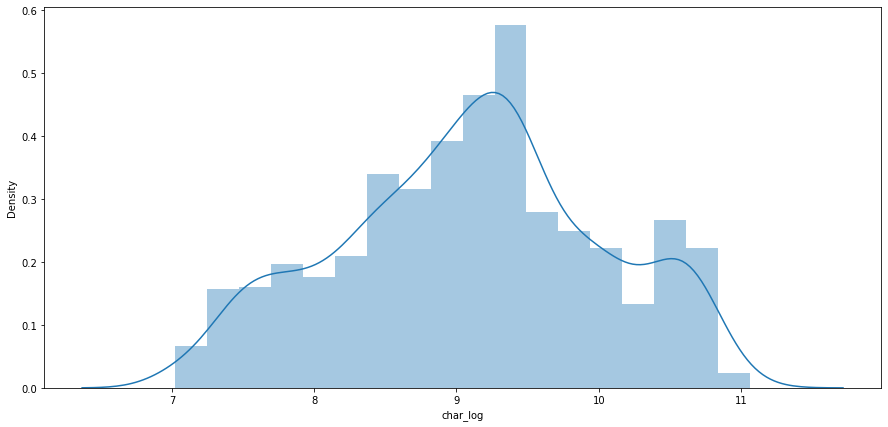

In [324]:
plt.figure(figsize=(15,7))
sns.distplot(data['char_log'])

As we can see log Transformation almost reduced all the skewness

Now we will check Box Transformation

In [325]:
from scipy import stats
char_box=stats.boxcox(data['charges'])[0]
pd.Series(char_box).skew()

-0.008734097133920383

In [326]:
char_box=pd.Series(char_box)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


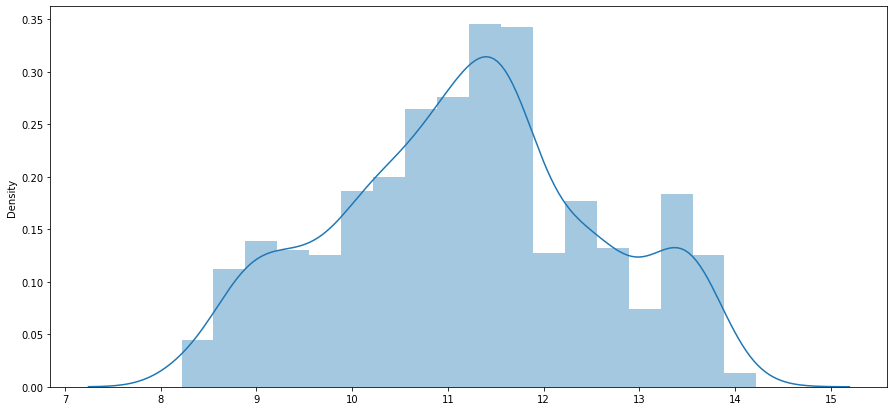

In [327]:
plt.figure(figsize=(15,7))
sns.distplot(char_box)

As we can see the box plot reduced most of the skewness

In [328]:
data['char_box']=char_box

In [329]:
data.head()

,age,sex,bmi,children,smoker,region,charges,char_sqrt,char_log,char_box
0,19,female,27.900,0,yes,southwest,16884.92400,129.942002,9.734176,12.128980
1,18,male,33.770,1,no,southeast,1725.55230,41.539768,7.453302,8.808596
2,28,male,33.000,3,no,southeast,4449.46200,66.704288,8.400538,10.147521
3,33,male,22.705,0,no,northwest,21984.47061,148.271611,9.998092,12.534950
4,32,male,28.880,0,no,northwest,3866.85520,62.184043,8.260197,9.945637


###now checking coorelation between the matrices

In [330]:
corr_dataframe=pd.DataFrame(data,columns=['age','char_box','bmi','children'])
corr_dataframe

,age,char_box,bmi,children
0,19,12.128980,27.900,0
1,18,8.808596,33.770,1
2,28,10.147521,33.000,3
3,33,12.534950,22.705,0
4,32,9.945637,28.880,0
...,...,...,...,...
1333,50,11.424196,30.970,3
1334,18,9.150491,31.920,0
1335,18,8.729683,36.850,0
1336,21,9.019131,25.800,0


In [331]:
matrix=corr_dataframe.corr()
matrix

,age,char_box,bmi,children
age,1.000000,0.518644,0.109272,0.042469
char_box,0.518644,1.000000,0.135792,0.156310
bmi,0.109272,0.135792,1.000000,0.012759
children,0.042469,0.156310,0.012759,1.000000


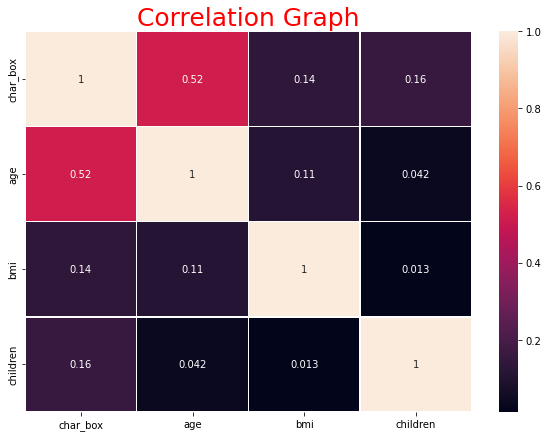

In [332]:
plt.figure(figsize=(10,7))
sns.heatmap(data[["char_box","age","bmi","children"]].corr(),annot=True, linewidths=.5)
plt.title("Correlation Graph",c="r",size=25)
plt.show()

###Scaling

In [377]:
cols=data.columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
pd_df=scaler.fit_transform(data.to_numpy())
data=pd.DataFrame(pd_df,columns=cols)
data

,age,sex,bmi,children,smoker,region,char_box
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.681644
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-1.748873
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.768781
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.978814
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.916560
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915,0.165744
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326,-1.498607
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495,-1.806638
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905,-1.594762


Now we have to encode the categorical variables

In [333]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['sex']=labelencoder.fit_transform(data['sex'])
data['smoker']=labelencoder.fit_transform(data['smoker'])
data['region']=labelencoder.fit_transform(data['region'])
data

,age,sex,bmi,children,smoker,region,charges,char_sqrt,char_log,char_box
0,19,0,27.900,0,1,3,16884.92400,129.942002,9.734176,12.128980
1,18,1,33.770,1,0,2,1725.55230,41.539768,7.453302,8.808596
2,28,1,33.000,3,0,2,4449.46200,66.704288,8.400538,10.147521
3,33,1,22.705,0,0,1,21984.47061,148.271611,9.998092,12.534950
4,32,1,28.880,0,0,1,3866.85520,62.184043,8.260197,9.945637
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,102.958964,9.268661,11.424196
1334,18,0,31.920,0,0,0,2205.98080,46.967870,7.698927,9.150491
1335,18,0,36.850,0,0,2,1629.83350,40.371196,7.396233,8.729683
1336,21,0,25.800,0,0,3,2007.94500,44.810099,7.604867,9.019131


In [334]:
data=data.drop(['charges','char_sqrt','char_log'],axis=1)
data

,age,sex,bmi,children,smoker,region,char_box
0,19,0,27.900,0,1,3,12.128980
1,18,1,33.770,1,0,2,8.808596
2,28,1,33.000,3,0,2,10.147521
3,33,1,22.705,0,0,1,12.534950
4,32,1,28.880,0,0,1,9.945637
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,11.424196
1334,18,0,31.920,0,0,0,9.150491
1335,18,0,36.850,0,0,2,8.729683
1336,21,0,25.800,0,0,3,9.019131


####Now lets Split the data into train and test

In [335]:
y=data['char_box']
y

0       12.128980
1        8.808596
2       10.147521
3       12.534950
4        9.945637
          ...    
1333    11.424196
1334     9.150491
1335     8.729683
1336     9.019131
1337    12.973661
Name: char_box, Length: 1338, dtype: float64

In [336]:
X=data.iloc[:,:-1]
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [337]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [338]:
X_train.shape

(936, 6)

In [339]:
y_train.shape

(936,)

In [340]:
X_test.shape

(402, 6)

In [341]:
y_test.shape

(402,)

####model building

In [347]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
linear_regressor=LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [350]:
y_train_pred=linear_regressor.predict(X_train)
score=r2_score(y_train,y_train_pred)
error=mean_squared_error(y_train,y_train_pred)

print("====================================")
print("score:",score)
print("error:",error)
print("====================================")

score: 0.78174002065079
error: 0.4200828210943664


In [351]:
y_test_pred=linear_regressor.predict(X_test)
score=r2_score(y_test,y_test_pred)
error=mean_squared_error(y_test,y_test_pred)

print("====================================")
print("score:",score)
print("error:",error)
print("====================================")

score: 0.7376942713642736
error: 0.4524275949118855


###Decision Tree

In [353]:
from sklearn.tree import DecisionTreeRegressor
dtree_regressor=DecisionTreeRegressor()
dtree_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [354]:
y_train_pred=dtree_regressor.predict(X_train)
score=r2_score(y_train,y_train_pred)
error=mean_squared_error(y_train,y_train_pred)

print("====================================")
print("score:",score)
print("error:",error)
print("====================================")

score: 0.9941899443668254
error: 0.011182556547364764


In [355]:
y_test_pred=dtree_regressor.predict(X_test)
score=r2_score(y_test,y_test_pred)
error=mean_squared_error(y_test,y_test_pred)

print("====================================")
print("score:",score)
print("error:",error)
print("====================================")

score: 0.5678629199481807
error: 0.7453544412352598


###Random Forest

In [358]:
from sklearn.ensemble import RandomForestRegressor
rtree_regressor=RandomForestRegressor()
rtree_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [359]:
y_train_pred=rtree_regressor.predict(X_train)
score=r2_score(y_train,y_train_pred)
error=mean_squared_error(y_train,y_train_pred)

print("====================================")
print("score:",score)
print("error:",error)
print("====================================")

score: 0.9723758480359483
error: 0.053167931757344834


In [360]:
y_test_pred=rtree_regressor.predict(X_test)
score=r2_score(y_test,y_test_pred)
error=mean_squared_error(y_test,y_test_pred)

print("====================================")
print("score:",score)
print("error:",error)
print("====================================")

score: 0.765190071408715
error: 0.40500255868036505


In [363]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [365]:
y_train_pred=svr.predict(X_train)
score=r2_score(y_train,y_train_pred)
error=mean_squared_error(y_train,y_train_pred)

print("====================================")
print("score:",score)
print("error:",error)
print("====================================")

score: 0.2300249074311912
error: 1.481963436554645


In [366]:
y_test_pred=svr.predict(X_test)
score=r2_score(y_test,y_test_pred)
error=mean_squared_error(y_test,y_test_pred)

print("====================================")
print("score:",score)
print("error:",error)
print("====================================")

score: 0.0956605605087355
error: 1.5598138848168064


###XGBOOST

In [373]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

[17:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [374]:
y_train_pred=xgb.predict(X_train)
score=r2_score(y_train,y_train_pred)
error=mean_squared_error(y_train,y_train_pred)

print("====================================")
print("score:",score)
print("error:",error)
print("====================================")

score: 0.8951335751884633
error: 0.20183536947205374


In [375]:
y_test_pred=svr.predict(X_test)
score=r2_score(y_test,y_test_pred)
error=mean_squared_error(y_test,y_test_pred)

print("====================================")
print("score:",score)
print("error:",error)
print("====================================")

score: 0.0956605605087355
error: 1.5598138848168064


###Normalization 